In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset = pd.read_csv('Trainfile.csv')
dataset.drop(["Idx"], axis = 1, inplace= True)

In [19]:
dataset_test = pd.read_csv('Testfile.csv')
dataset_test.drop(["Idx"], axis = 1, inplace= True)

In [20]:
dataset[["LotFrontage","MasVnrArea"]]=dataset[["LotFrontage","MasVnrArea"]].fillna(dataset[["LotFrontage","MasVnrArea"]].mean()) 

In [21]:
dataset_test[["LotFrontage","MasVnrArea"]]=dataset_test[["LotFrontage","MasVnrArea"]].fillna(dataset_test[["LotFrontage","MasVnrArea"]].mean())

In [22]:
dataset["GarageYrBlt"] = dataset["GarageYrBlt"].fillna(0)
dataset_test["GarageYrBlt"] = dataset_test["GarageYrBlt"].fillna(0)

In [23]:
for i in range(len(dataset.columns)):
    if dataset[dataset.columns[i]].dtypes == object:
        codes,uniques = pd.factorize(dataset.iloc[:,i])
        codes = tuple(x+1 for x in codes)
        dataset.iloc[:,i] = codes 
        
for i in range(len(dataset_test.columns)):
    if dataset_test[dataset_test.columns[i]].dtypes == object:
        codes,uniques = pd.factorize(dataset_test.iloc[:,i])
        codes = tuple(x+1 for x in codes)
        dataset_test.iloc[:,i] = codes    

In [24]:
pd.set_option('display.max_columns', None)
dataset.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,45,1,59.000000,7227,1,0,1,1,1,1,1,1,1,1,1,1,6,6,1954,1954,1,1,1,1,1,0.0,1,1,1,1,1,1,1,0,1,0,832,832,1,1,1,1,832,0,0,832,0,0,1,0,2,1,1,4,1,0,0,1,1962.0,1,2,528,1,1,1,0,0,0,0,0,0,0,0,0,0,6,2008,1,1,105500
1,60,1,70.484009,12227,1,0,2,2,1,1,2,2,2,1,1,2,6,7,1977,1995,1,1,2,2,2,424.0,1,2,1,2,2,1,2,896,1,0,434,1330,1,2,1,1,1542,1330,0,2872,1,0,2,1,4,1,2,11,1,1,1,2,1977.0,2,2,619,1,1,1,550,282,0,0,0,0,0,0,0,0,7,2008,1,1,272000
2,20,1,65.000000,7800,1,0,1,2,1,2,2,3,3,1,1,3,5,7,1967,2004,2,1,2,2,2,89.0,1,1,2,1,1,1,2,450,1,0,414,864,1,3,1,1,899,0,0,899,0,0,1,0,3,1,1,5,1,0,0,2,1967.0,2,1,288,1,1,1,64,0,0,0,0,0,0,1,0,0,6,2009,1,1,130000
3,60,1,88.000000,12665,1,0,2,2,1,2,2,4,3,1,1,2,8,5,2005,2006,2,1,3,3,2,245.0,2,1,2,2,2,2,1,0,1,0,1094,1094,1,3,1,1,1133,1349,0,2482,0,0,2,1,4,1,1,9,1,1,2,3,2005.0,2,3,642,1,1,1,144,39,0,0,0,0,0,0,0,0,2,2007,1,1,281213
4,20,1,105.000000,15431,1,0,1,2,1,2,2,5,3,1,1,3,10,5,2008,2008,2,1,3,3,3,200.0,3,1,2,3,1,2,3,1767,2,539,788,3094,1,3,1,1,2402,0,0,2402,1,0,2,0,2,1,3,10,1,2,2,2,2008.0,2,3,672,1,1,1,0,72,0,0,170,0,0,0,0,0,4,2009,1,1,555000


In [25]:
d = np.zeros(len(dataset.columns)-1)
for i in range(len(dataset.columns)-1):
    d[i]=dataset.iloc[:,i].std()
dataset.rename(columns={'MSSubClass':'0','MSZoning':'1','LotFrontage':'2','LotArea':'3','Street':'4','Alley':'5','LotShape':'6','LandContour':'7','LotConfig':'8','LandSlope':'9','Neighborhood':'10','Condition1':'11','Condition2':'12','BldgType':'13','HouseStyle':'14','OverallQual':'15','OverallCond':'16','YearBuilt':'17','YearRemodAdd':'18','RoofStyle':'19','RoofMatl':'20','Exterior1st':'21','Exterior2nd':'22','MasVnrType':'23','MasVnrArea':'24','ExterQual':'25','ExterCond':'26','Foundation':'27','BsmtQual':'28','BsmtCond':'29','BsmtExposure':'30','BsmtFinType1':'31','BsmtFinSF1':'32','BsmtFinType2':'33','BsmtFinSF2':'34','BsmtUnfSF':'35','TotalBsmtSF':'36','Heating':'37','HeatingQC':'38','CentralAir':'39','Electrical':'40','1stFlrSF':'41','2ndFlrSF':'42','LowQualFinSF':'43','GrLivArea':'44','BsmtFullBath':'45','BsmtHalfBath':'46','FullBath':'47','HalfBath':'48','BedroomAbvGr':'49','KitchenAbvGr':'50','KitchenQual':'51','TotRmsAbvGrd':'52','Functional':'53','Fireplaces':'54','FireplaceQu':'55','GarageType':'56','GarageYrBlt':'57','GarageFinish':'58','GarageCars':'59','GarageArea':'60','GarageQual':'61','GarageCond':'62','PavedDrive':'63','WoodDeckSF':'64','OpenPorchSF':'65','EnclosedPorch':'66','3SsnPorch':'67','ScreenPorch':'68','PoolArea':'69','PoolQC':'70','Fence':'71','MiscFeature':'72','MiscVal':'73','MoSold':'74','YrSold':'75','SaleType':'76','SaleCondition':'77'}, inplace=True)
dataset_test.rename(columns={'MSSubClass':'0','MSZoning':'1','LotFrontage':'2','LotArea':'3','Street':'4','Alley':'5','LotShape':'6','LandContour':'7','LotConfig':'8','LandSlope':'9','Neighborhood':'10','Condition1':'11','Condition2':'12','BldgType':'13','HouseStyle':'14','OverallQual':'15','OverallCond':'16','YearBuilt':'17','YearRemodAdd':'18','RoofStyle':'19','RoofMatl':'20','Exterior1st':'21','Exterior2nd':'22','MasVnrType':'23','MasVnrArea':'24','ExterQual':'25','ExterCond':'26','Foundation':'27','BsmtQual':'28','BsmtCond':'29','BsmtExposure':'30','BsmtFinType1':'31','BsmtFinSF1':'32','BsmtFinType2':'33','BsmtFinSF2':'34','BsmtUnfSF':'35','TotalBsmtSF':'36','Heating':'37','HeatingQC':'38','CentralAir':'39','Electrical':'40','1stFlrSF':'41','2ndFlrSF':'42','LowQualFinSF':'43','GrLivArea':'44','BsmtFullBath':'45','BsmtHalfBath':'46','FullBath':'47','HalfBath':'48','BedroomAbvGr':'49','KitchenAbvGr':'50','KitchenQual':'51','TotRmsAbvGrd':'52','Functional':'53','Fireplaces':'54','FireplaceQu':'55','GarageType':'56','GarageYrBlt':'57','GarageFinish':'58','GarageCars':'59','GarageArea':'60','GarageQual':'61','GarageCond':'62','PavedDrive':'63','WoodDeckSF':'64','OpenPorchSF':'65','EnclosedPorch':'66','3SsnPorch':'67','ScreenPorch':'68','PoolArea':'69','PoolQC':'70','Fence':'71','MiscFeature':'72','MiscVal':'73','MoSold':'74','YrSold':'75','SaleType':'76','SaleCondition':'77'}, inplace=True)

In [26]:
for i in range(len(dataset.columns)-2):
    if (d[i]<=0.5) :
        dataset.drop([str(i)], inplace=True, axis=1) 
        dataset_test.drop([str(i)], inplace=True, axis=1) 

In [27]:
dataset=dataset.drop(['Utilities'] , axis=1)
dataset_test=dataset_test.drop(['Utilities'] , axis=1)
for i in range(len(dataset.columns)-1):
    dataset.iloc[:,i] = (dataset.iloc[:,i] - dataset.iloc[:,i].mean())/dataset.iloc[:,i].std()
    
for i in range(len(dataset_test.columns)-1):
    dataset_test.iloc[:,i] = (dataset_test.iloc[:,i] - dataset_test.iloc[:,i].mean())/dataset_test.iloc[:,i].std()    

In [28]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])
dataset.head()

,0,1,2,3,6,9,11,12,14,15,16,17,18,19,20,22,23,24,25,26,28,29,31,32,33,34,35,36,37,39,42,43,44,45,46,48,49,50,52,53,54,55,56,57,58,59,60,61,62,65,66,67,68,69,70,72,74,75,76,77,SalePrice
0,-0.296776,-0.473179,-5.063420e-01,-0.393466,-0.652591,-4.32733,-1.962931,-0.088254,-1.730382,-0.081216,0.361703,-0.559283,-1.493346,-0.442798,-0.112576,-1.115141,-0.728396,-0.575507,-0.698402,-0.347736,-0.812772,-0.196379,-1.058946,-0.973404,-0.281508,-0.276574,0.608600,-0.488216,-0.14181,-0.271146,-0.810448,-0.122993,-1.291637,-0.819625,-0.254055,-0.772965,-1.061552,-0.223245,-1.551337,-0.238463,-0.950904,-0.859925,-0.901091,0.216428,-0.807703,0.328271,0.264859,-0.055573,0.008218,-0.708058,-0.367372,-0.117325,-0.269849,-0.066045,-0.061294,-0.18524,-0.121984,0.115245,-0.347209,-0.397459,11.566466
1,0.056007,-0.473179,-8.145430e-15,0.252298,0.904324,0.14949,-1.079301,-0.088254,-0.897750,-0.081216,1.260434,0.197590,0.495140,-0.442798,-0.112576,-0.748475,0.686134,1.798295,-0.698402,2.021865,0.504799,1.994592,-0.404722,1.006428,-0.281508,-0.276574,-0.290040,0.648244,-0.14181,-0.271146,2.223309,-0.122993,2.564943,1.107510,-0.254055,1.203742,1.369125,-0.223245,2.726251,-0.238463,0.624247,0.064149,0.289898,0.248358,0.251244,0.328271,0.682629,-0.055573,0.008218,3.496037,-0.367372,-0.117325,-0.269849,-0.066045,-0.061294,-0.18524,0.245260,0.115245,-0.347209,-0.397459,12.513557
2,-0.884748,-0.473179,-2.417957e-01,-0.319461,-0.652591,0.14949,-0.195672,-0.088254,-0.065118,-0.808965,1.260434,-0.131486,0.931636,1.337781,-0.112576,-0.748475,0.686134,-0.077233,-0.698402,-0.347736,-0.812772,-0.196379,-0.404722,0.020931,-0.281508,-0.276574,-0.335197,-0.415191,-0.14181,-0.271146,-0.810448,-0.122993,-1.164974,-0.819625,-0.254055,-0.772965,0.153786,-0.223245,-0.940253,-0.238463,-0.950904,-0.859925,0.289898,0.227072,0.251244,-0.987124,-0.836953,-0.055573,0.008218,-0.708058,-0.367372,-0.117325,-0.269849,-0.066045,-0.061294,-0.18524,-0.121984,0.868971,-0.347209,-0.397459,11.775290
3,0.056007,-0.473179,7.722985e-01,0.308867,0.904324,0.14949,-0.195672,-0.088254,-0.897750,1.374282,-0.537027,1.119001,1.028636,1.337781,-0.112576,-0.381809,0.686134,0.796147,0.894346,-0.347736,0.504799,1.994592,-1.058946,-0.973404,-0.281508,-0.276574,1.200167,0.109681,-0.14181,-0.271146,2.266648,-0.122993,1.827656,-0.819625,-0.254055,1.203742,1.369125,-0.223245,1.504083,-0.238463,0.624247,0.988224,1.480888,0.307960,0.251244,1.643666,0.788220,-0.055573,0.008218,-0.126641,-0.367372,-0.117325,-0.269849,-0.066045,-0.061294,-0.18524,-1.590962,-0.638482,-0.347209,-0.397459,12.546868
4,-0.884748,-0.473179,1.521846e+00,0.666104,-0.652591,0.14949,-0.195672,-0.088254,-0.065118,2.829780,-0.537027,1.217723,1.125635,1.337781,-0.112576,-0.381809,2.100663,0.544211,2.487094,-0.347736,1.822370,-0.196379,0.249502,2.931018,0.745274,3.193939,0.509253,4.673779,-0.14181,-0.271146,-0.810448,-0.122993,1.676417,1.107510,-0.254055,-0.772965,-1.061552,-0.223245,2.115167,-0.238463,2.199398,0.988224,0.289898,0.314346,0.251244,1.643666,0.925946,-0.055573,0.008218,0.365328,-0.367372,-0.117325,2.878633,-0.066045,-0.061294,-0.18524,-0.856473,0.868971,-0.347209,-0.397459,13.226723


In [31]:
X = dataset.iloc[:,0:60].values
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

X_test = dataset_test.iloc[:,0:60].values
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)

y = dataset.iloc[:,60:61].values
y_test = dataset_test.iloc[:,60:61].values
theta = np.zeros([1,len(dataset.columns)])
print (y)

[[11.56646623]
 [12.51355735]
 [11.77528973]
 ...
 [11.94794938]
 [12.37370349]
 [12.10015642]]


In [32]:
def cost_func(X,y,theta):
    cost_ = np.power((np.dot(X , theta.T)-y),2)
    return np.sum(cost_)/(2 * len(X))

In [33]:
alpha = 0.01
iters = 2000
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (np.dot(X , theta.T) - y), axis=0)
        cost[i] = cost_func(X, y, theta)
    
    return theta,cost

thta,cost = gradientDescent(X,y,theta,iters,alpha)
Cost_value = cost_func(X,y,thta)
print(Cost_value)

0.009196576735771242


Text(0, 0.5, 'cost')

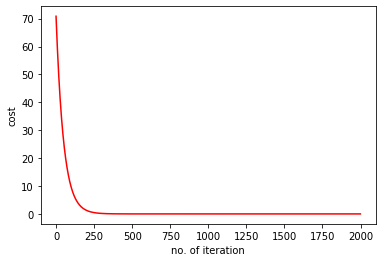

In [34]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('no. of iteration')  
ax.set_ylabel('cost')  

In [35]:
y_pred = np.dot(X_test,thta.T)
for i in range(322):
    y_pred[i] = np.exp(y_pred[i])
    
print (y_pred)    

[[114984.9710658 ]
 [163648.49757313]
 [225836.45037519]
 [156236.04002585]
 [ 86808.24838054]
 [323827.60075397]
 [140747.25536957]
 [201782.50314156]
 [235191.37389868]
 [151251.30936145]
 [ 79756.06297947]
 [117629.03961049]
 [371024.89804987]
 [283836.52173672]
 [112425.02267019]
 [159979.63897515]
 [175305.52798411]
 [135496.71035268]
 [107924.82636575]
 [199813.39373293]
 [392526.00963895]
 [290879.65891363]
 [182673.33736394]
 [233802.69670446]
 [146126.86594966]
 [118656.46337349]
 [147516.34895935]
 [130666.34938387]
 [238134.23324962]
 [132398.23086803]
 [275914.32505737]
 [131747.47217779]
 [188875.55514591]
 [159780.18520463]
 [167905.81435075]
 [180213.78115905]
 [131437.10107747]
 [313550.3322208 ]
 [166622.41094267]
 [100100.12758254]
 [115996.59305065]
 [195834.65172286]
 [114367.10166802]
 [314170.59616332]
 [154256.91619234]
 [232150.93472551]
 [119864.7900388 ]
 [122045.88181353]
 [140611.88793071]
 [156934.82741235]
 [287549.22226218]
 [214954.9629986 ]
 [ 62555.469

In [36]:
Mape = 0
for i in range(322):
    Mape += abs(y_pred[i]-y_test[i])/y_test[i]
    
accuracy = 100-Mape*100/322
print('Accuracy is', float(accuracy),'%')

Accuracy is 89.31298577946039 %
